# BUSINESS PROBLEM SETTING

Case study of a online retailer specializing in consumer electronics seeking patterns on performance of each acquisition channel, revealing which channels to double down and which to cut budget onto. With a wide range marketing channels that brands are present to reach their customer prospects and put the messaging out there, it's important to reflect on which channel converts better, which channel costs less and which channel brings in the most revenue. The objective of this analysis is to extract useful knowledge on performance of each acquisition channel and bring out insights to inform budgeting as well as customer targeting strategies.

In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# DATA UNDERSTANDING

The given dataset provides data values and categories on following variables:
* customer_id: unique identifier of each customer
* channel: marketing channel that acquires the customer (first-touch attribution)
* cost: total cost to acquire the particular customer
* conversion_rate: ratio of successful purchase conversions to the total number of interactions of the customer
* revenue: total revenue the customer has brought in


In [2]:
data = pd.read_csv('/kaggle/input/customer-lifetime-value-analytics-case-study/customer_acquisition_data.csv')
print(data.head())

   customer_id           channel       cost  conversion_rate  revenue
0            1          referral   8.320327         0.123145     4199
1            2  paid advertising  30.450327         0.016341     3410
2            3   email marketing   5.246263         0.043822     3164
3            4      social media   9.546326         0.167592     1520
4            5          referral   8.320327         0.123145     2419


In [3]:
data.shape

(800, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [5]:
#how many unique categories of the channel variable
data['channel'].unique()

array(['referral', 'paid advertising', 'email marketing', 'social media'],
      dtype=object)

In [6]:
#summery statistics (mean, min, max) of cost, conversion_rate, revenue and the distribution of the data for each variable
data.drop('customer_id', axis=1).describe()

,cost,conversion_rate,revenue
count,800.000000,800.000000,800.000000
mean,13.148052,0.086305,2769.151250
std,9.922337,0.059611,1259.543706
min,5.246263,0.016341,500.000000
25%,5.246263,0.043822,1694.000000
50%,8.320327,0.043822,2764.000000
75%,9.546326,0.123145,3824.250000
max,30.450327,0.167592,4998.000000


In [7]:
#correlation overview of 3 main variables
data.drop('customer_id', axis=1).set_index('channel').corr()

,cost,conversion_rate,revenue
cost,1.000000,-0.537430,0.018642
conversion_rate,-0.537430,1.000000,-0.050456
revenue,0.018642,-0.050456,1.000000


# EXPLORATORY DATA ANALYSIS: WHICH CHANNEL IS THE MOST PROFITABLE?

# Numeric data distribution of cost, conversion rate and revenue

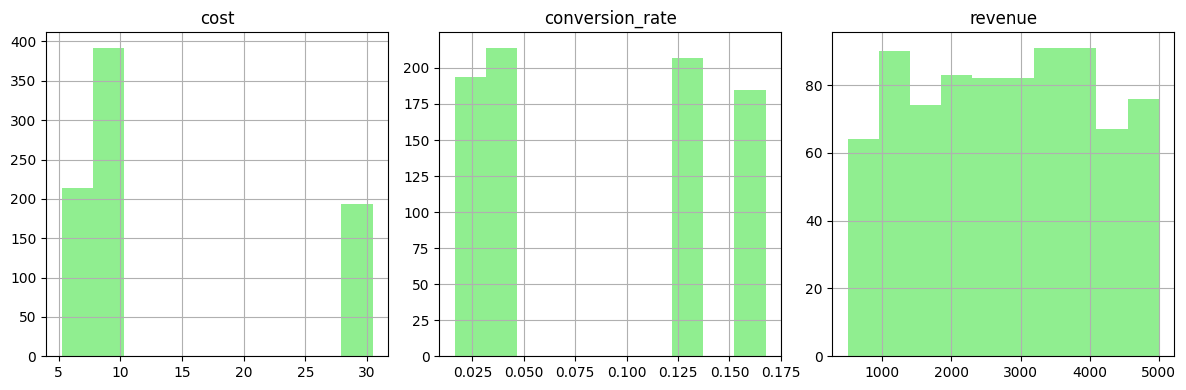

In [8]:
#data distribution of main variables
data.drop('customer_id', axis=1).hist(figsize=(12,4),color='lightgreen', layout=(1,3))
plt.tight_layout()

There doesn't seem to have any patterns in the data distribution of values of cost, conversion rate and revenue. One hypothesis is that the data is quite limited to form any clearer trends like a normal distribution or tails in value distribution.

# Revenue percentage by channel

Text(0, 0.5, '')

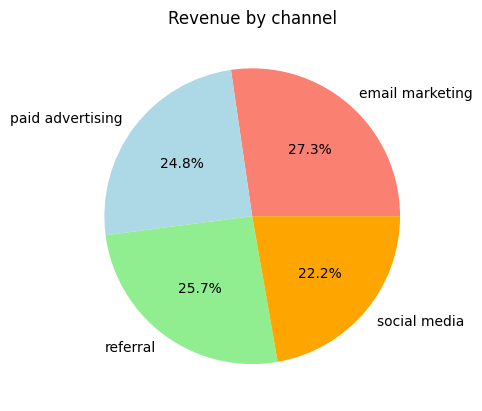

In [9]:
#revenue percentage by channel
data.groupby('channel')['revenue'].sum().plot.pie(colors = ['salmon', 'lightblue', 'lightgreen', 'orange'],autopct='%1.1f%%')
plt.title('Revenue by channel')
plt.ylabel('')


Email marketing is the highest revenue-contributing channel, accounting for 27.3% of the total revenue, while social media contributes the least, representing 22.2% of the total revenue. Since the differences in percentage are relatively small, it is difficult to draw definitive conclusions about the performance of individual channels in comparison to one another.

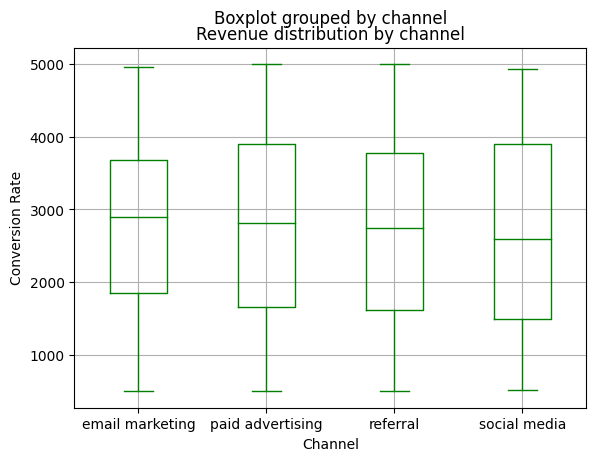

In [10]:
data.boxplot(column='revenue', by='channel', color='green')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.title('Revenue distribution by channel')
plt.show()

This boxplot provides a different angle at the revenue by channel. Even though paid advertising contribute the least to the total revenue, in the revenue data points, paid ads has higher mean (second quartile), first quartile and third quartile than those of referral and social media channels.

# Conversion rate by marketing channel

Text(0.5, 1.0, 'Average conversion rate by channel')

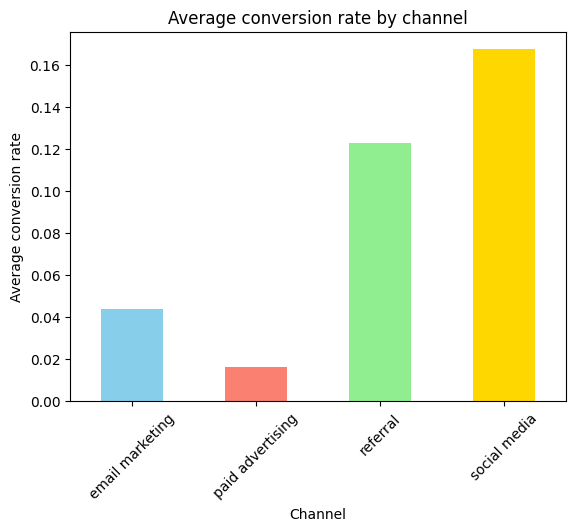

In [11]:
#Group average conversion rate by channel 
con_data=data.groupby('channel')['conversion_rate'].mean()
con_data.plot.bar (x='channel', y='conversion_rate', color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.xlabel('Channel')
plt.xticks(fontsize=10, rotation=45)
plt.ylabel('Average conversion rate')
plt.yticks(fontsize=10)
plt.title('Average conversion rate by channel')

Social media has the highest conversion rates,surpassing an average rate of 0.16. On the other hand, paid advertising represents the lowest conversion performance when falling below an average rate of 0.02. Given the similar behaviors and affinity patterns among customers from each marketing channel, identifying the acquisition channel that attracts engaged and converting customers is important as this insight enables businesses to strategically allocate the marketing resources and efforts.

# Cost per acquisition (CAC) by marketing channel

In [12]:
#calculate cost per acquisition (average cost to acquire each customer) for each channel 
cac=round((data.groupby('channel')['cost'].sum())/(data.groupby('channel')['customer_id'].count()),2)
cac_df=pd.DataFrame({'Channel':cac.index,'CAC':cac.values})
cac_df

,Channel,CAC
0,email marketing,5.25
1,paid advertising,30.45
2,referral,8.32
3,social media,9.55


Instead of examining cost metric, we will calculate and dive into Cost Per Acquisition (CAC) to gain a more complete understanding of the cost-effectiveness of each channel. Formula used to compute CAC is:

*Customer acquisition cost = Total cost/Total customers acquired 
*

This simplified CAC formula assumes that the cost column encompasses all associated expenses related to customer acquisition, such as tools, salaries, advertising spend, and more.


# Return on investment by marketing channel

In [13]:
#calculate roi (return on investment) for each channel
roi=round((data.groupby('channel')['revenue'].sum()-data.groupby('channel')['cost'].sum())/data.groupby('channel')['cost'].sum()*100,2)
roi_df=pd.DataFrame({'Channel': roi.index, 'ROI': roi.values})
roi_df


,Channel,ROI
0,email marketing,53761.75
1,paid advertising,9183.26
2,referral,32969.12
3,social media,27796.23


ROI (return on investment) helps quantify performance of each marketing channel in terms of revenue and profit growth. The following formula is used to calculate the ROI for each channel:

ROI = (Total revenue - Total cost)/Total cost * 100%

Comparing ROI metric between marketing channels will help to examine which channel proves a greater efficiency in marketing spend. Paid advertising has the highest CAC and the return on investment is the lowest so the company should consider cutting down the budget or changing the bidding and targeting strategies. For example, one shift could involve refocusing paid ads on retargeting prospects who have spent a certain duration on the website, interacted with some specific products, or even better, already made previous conversions. This approach aims to reduce costs while increasing potential revenue by targeting individuals with higher purchase intent and enhanced brand awareness.


In addition, as email marketing is the channel with the highest ROI, proving the spending on this channel has paid off, signaling there is an opportunity to increase investments in email marketing, execute more tailored campaigns, and implement engagement strategies to captivate and nurture both cold leads and existing customers.

Referral also exhibits lots of potential due to the decent ROI and low CAC. It's worth exploring some experimentation ideas with new referral strategies (e.g. double referrabl amount for a month, etc.) and push more messages to promote the referral campaign to make it better known among the existing customer base.


Text(0.5, 1.0, 'CAC and ROI correlation')

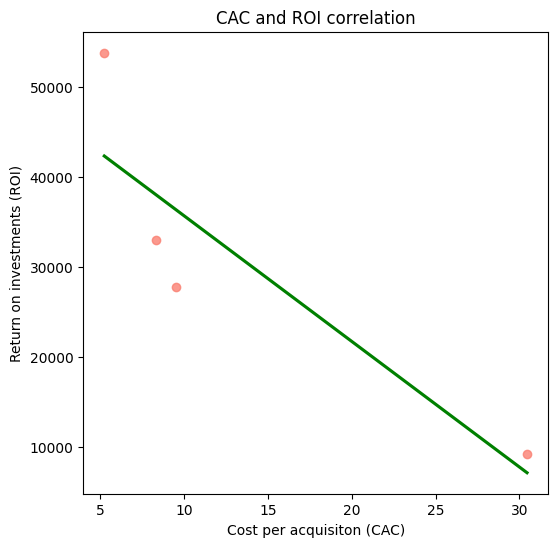

In [14]:
#plot the correlation of CAC and ROI
plt.figure(figsize=(6, 6))
sns.regplot(x=cac, y=roi, ci=None, scatter_kws={'color': 'salmon'}, line_kws={'color': 'green'})
plt.xlabel('Cost per acquisiton (CAC)')
plt.ylabel('Return on investments (ROI)')
plt.title('CAC and ROI correlation')



A negative correlation exists between the cost per acquisition (CAC) and return on investment (ROI) by channel. When CAC is higher, ROI tends to be lower. Simply increasing the budget does not mean a better investment performance. It is crucial to refine our current marketing strategies to be more targeted and strategic. With our current methods of allocating marketing budgets and acquiring customers, we are not optimizing our spending efficiently.

# MARKETING CHANNEL PROFITABILITY ANALYSIS SUMMARY

A deeper look at metrics of cost, conversion, revenue by channel and additionally calculated metrics of CAC and ROI has helped to shade a brigher light onto which channel is more profitable and worth doubling or even tripling down in terms of marketing budget and efforts, some take-away insighst gleaned from the analysis are:
- Email marketing exhibits the highest ROI and lowest CAC, suggesting opportunities for increased spending investments and more tailored CRM campaigns.
- Paid advertising has the lowest ROI yet the highest CAC, indicating a need for budget reduction or drastic strategy adjustments.
- Simply increasing the budget does not guarantee improved investment performance; a review of current spending and marketing strategies is necessary as we are not spending marketing money in an efficient way.
